In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('IAS.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     72731 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [6]:
df.describe()

,RowID,Crop_Year,Area,Production
count,73827.000000,73827.000000,7.382700e+04,7.273100e+04
mean,36913.000000,2013.657551,1.218297e+04,6.210320e+05
std,21312.163499,4.954910,5.348285e+04,1.749756e+07
min,0.000000,2005.000000,4.000000e-02,0.000000e+00
25%,18456.500000,2010.000000,8.100000e+01,8.900000e+01
50%,36913.000000,2014.000000,5.900000e+02,7.290000e+02
75%,55369.500000,2018.000000,4.500000e+03,7.200000e+03
max,73826.000000,2023.000000,8.580100e+06,1.125000e+09


In [9]:
df.isnull().sum()

RowID               0
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       1096
dtype: int64

In [15]:
df['Production'].replace(np.nan, df['Production'].mean(), inplace=True)

C:\Users\IFC-58\AppData\Local\Temp\ipykernel_5080\3934026681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Production'].replace(np.nan, df['Production'].mean(), inplace=True)


In [16]:
df.isnull().sum()

RowID            0
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [17]:
df.columns

Index(['RowID', 'State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production'],
      dtype='object')

In [18]:
df.shape

(73827, 8)

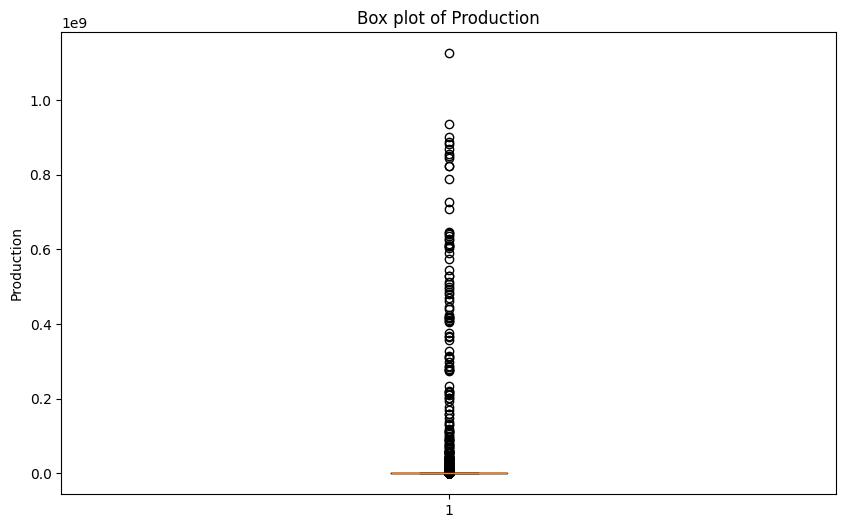

In [26]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Production'])
plt.title('Box plot of Production')
plt.ylabel('Production')
plt.show()

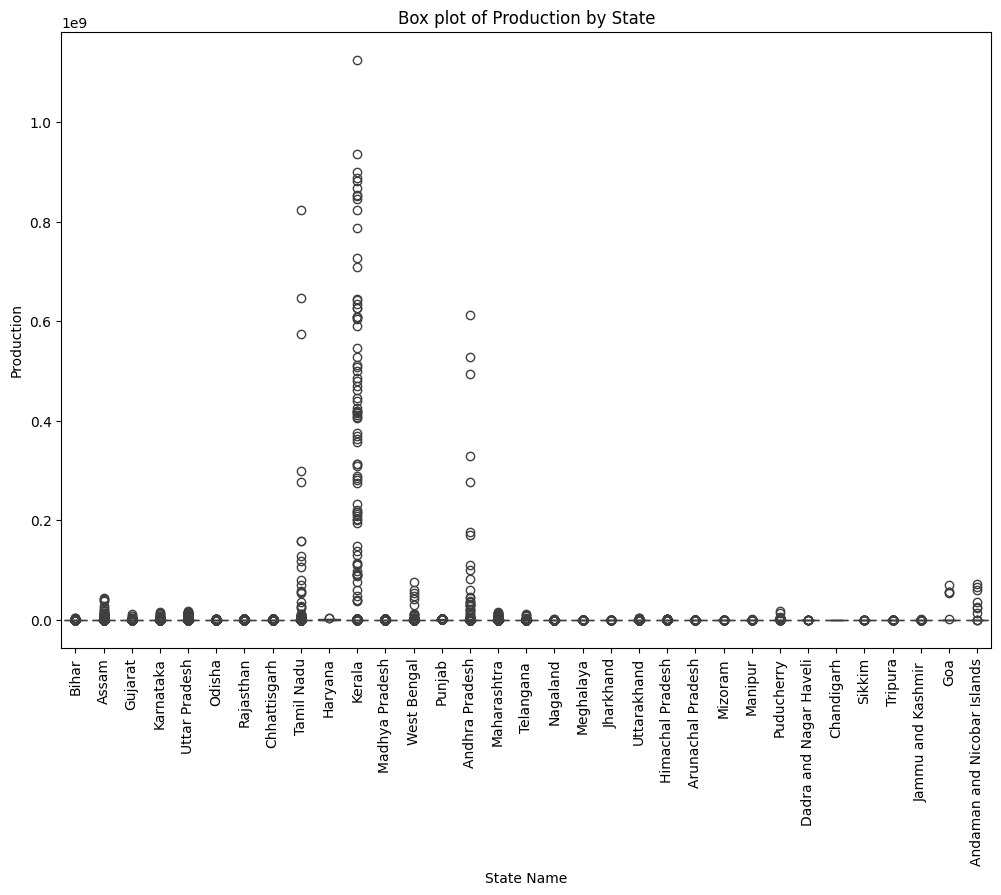

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df[column], y=df['Production'])
plt.title('Box plot of Production by State')
plt.ylabel('Production')
plt.xlabel('State Name')
plt.xticks(rotation=90)
plt.show()

In [28]:
yearly_production = df.groupby('Crop_Year')['Production'].sum()
print(yearly_production.sort_values(ascending=False).head())

Crop_Year
2019    5.415571e+09
2012    3.943383e+09
2020    3.912047e+09
2017    3.796313e+09
2014    3.776885e+09
Name: Production, dtype: float64


In [29]:
crop_production = df.groupby('Crop')['Production'].sum()
most_produced_crop = crop_production.idxmax()
most_produced_crop_production = crop_production.max()

print(f"The crop with the most production is {most_produced_crop} with a production of {most_produced_crop_production}.")

The crop with the most production is Coconut  with a production of 41803463849.70686.


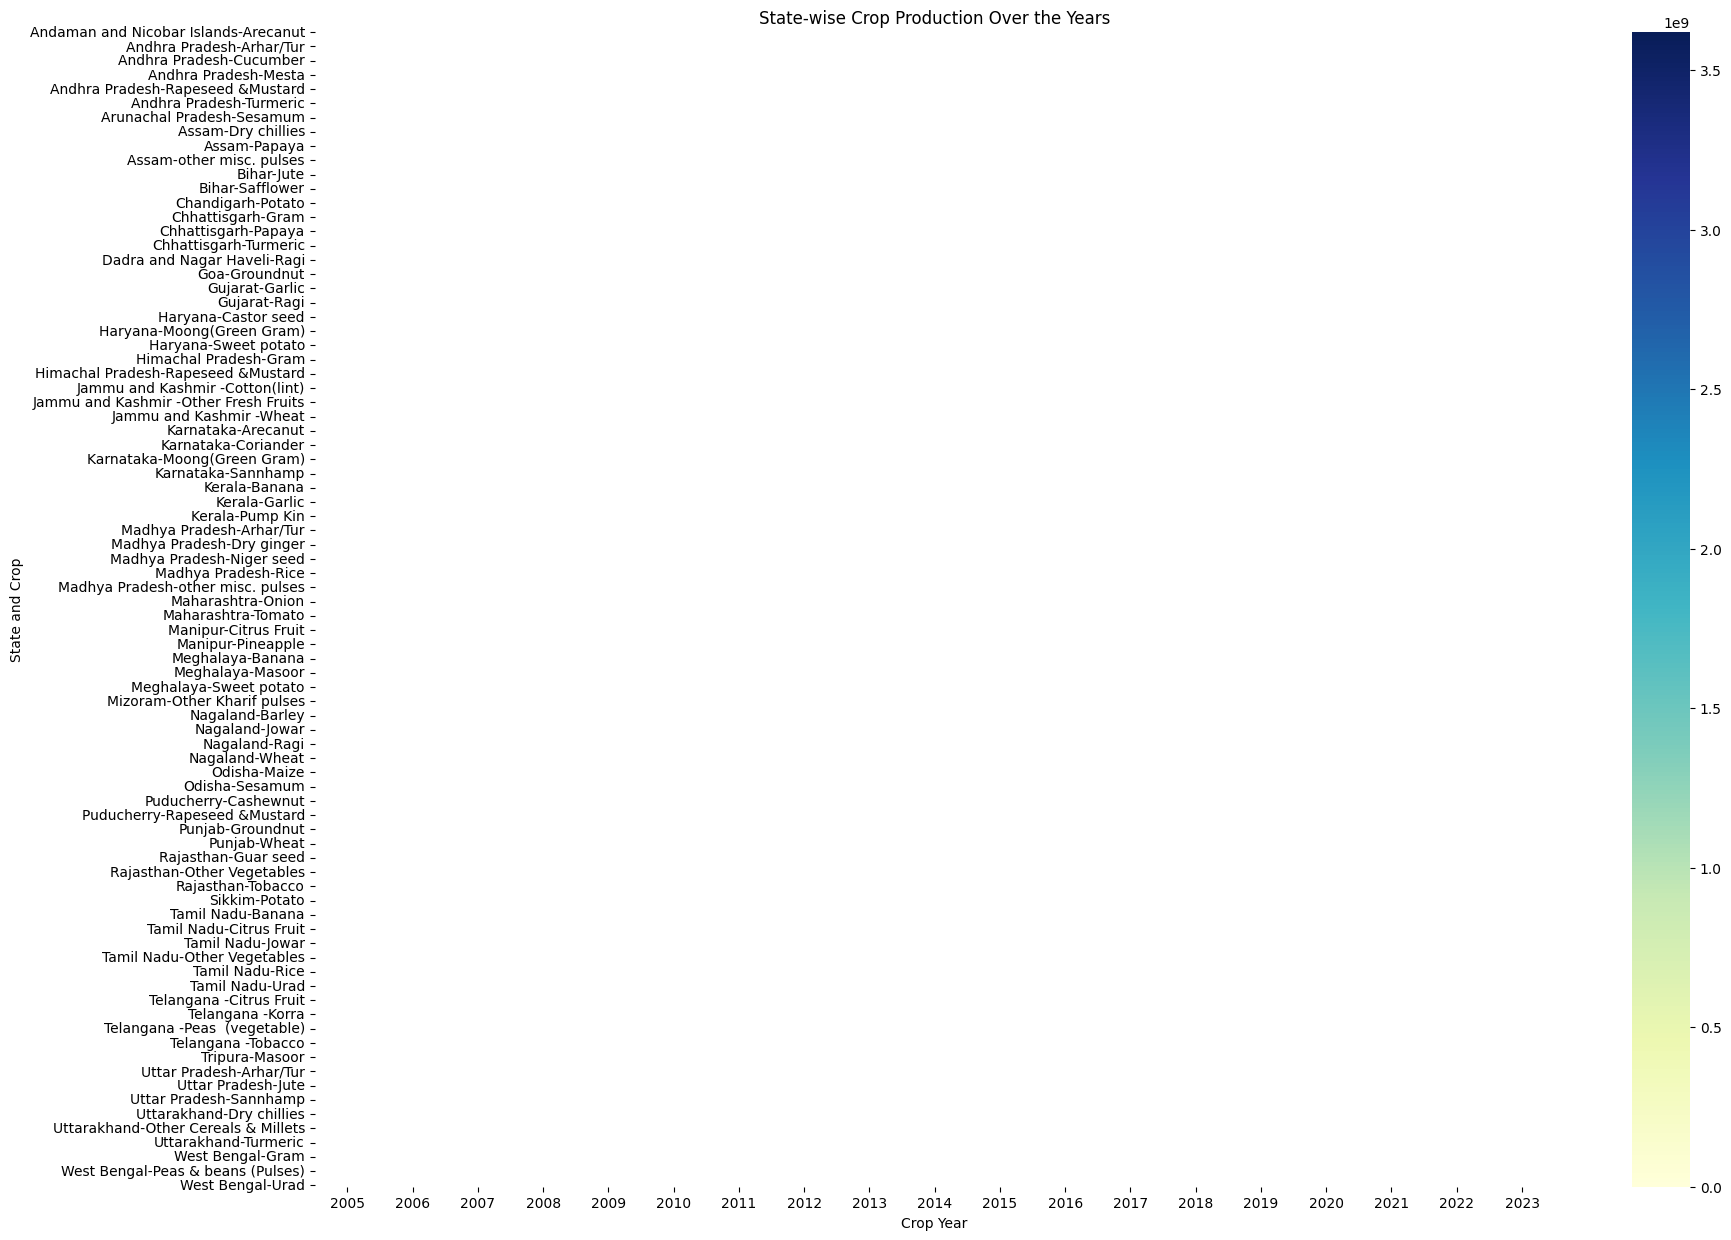

In [32]:
plt.figure(figsize=(20, 15))
sns.heatmap(state_wise_crop_production, cmap='YlGnBu', linewidths=.5)
plt.title('State-wise Crop Production Over the Years')
plt.xlabel('Crop Year')
plt.ylabel('State and Crop')
plt.show()

Area Statistics:
count    7.382700e+04
mean     1.218297e+04
std      5.348285e+04
min      4.000000e-02
25%      8.100000e+01
50%      5.900000e+02
75%      4.500000e+03
max      8.580100e+06
Name: Area, dtype: float64

Production Statistics:
count    7.382700e+04
mean     6.210320e+05
std      1.736719e+07
min      0.000000e+00
25%      9.200000e+01
50%      7.870000e+02
75%      8.198500e+03
max      1.125000e+09
Name: Production, dtype: float64


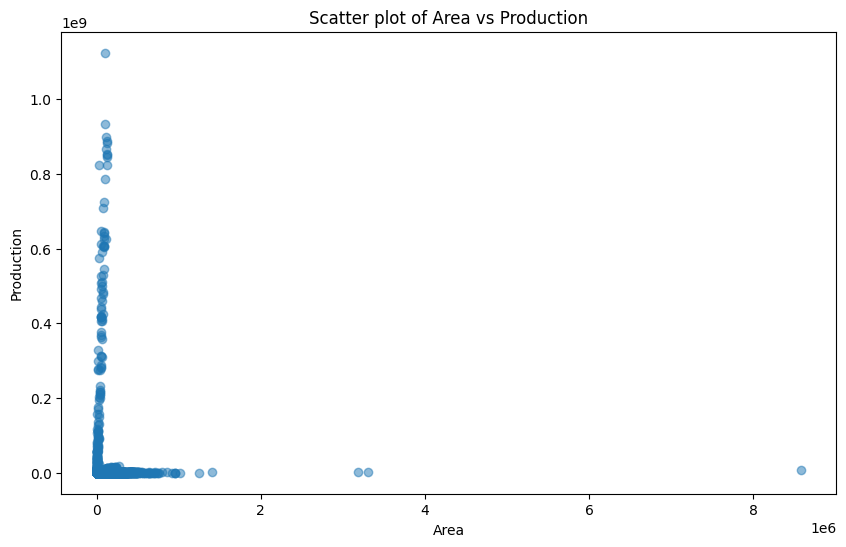


Correlation between Area and Production:
                Area  Production
Area        1.000000    0.040989
Production  0.040989    1.000000


In [34]:
# Basic statistics for 'Area' and 'Production'
area_stats = df['Area'].describe()
production_stats = df['Production'].describe()

print("Area Statistics:")
print(area_stats)
print("\nProduction Statistics:")
print(production_stats)

# Scatter plot to visualize the relationship between 'Area' and 'Production'
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Production'], alpha=0.5)
plt.title('Scatter plot of Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

# Correlation between 'Area' and 'Production'
correlation = df[['Area', 'Production']].corr()
print("\nCorrelation between Area and Production:")
print(correlation)

In [37]:
# Group by Season and Crop, then sum the Production
seasonal_crop_production = df.groupby(['Season', 'Crop'])['Production'].sum()

# Find the crop with the highest production for each season
suggested_crops = seasonal_crop_production.groupby('Season').idxmax()
suggested_crops_production = seasonal_crop_production.groupby('Season').max()

# Print the suggested crops for each season
for season, crop in suggested_crops.items():
    print(f"The suggested crop for {season} is {crop[1]} with a production of {suggested_crops_production[season]}.")

The suggested crop for Autumn      is Rice with a production of 17312596.376715157.
The suggested crop for Kharif      is Sugarcane with a production of 514088613.0.
The suggested crop for Rabi        is Wheat with a production of 386958104.18014544.
The suggested crop for Summer      is Rice with a production of 38116026.34335758.
The suggested crop for Whole Year  is Coconut  with a production of 41803462487.70686.
The suggested crop for Winter      is Rice with a production of 117627086.25.


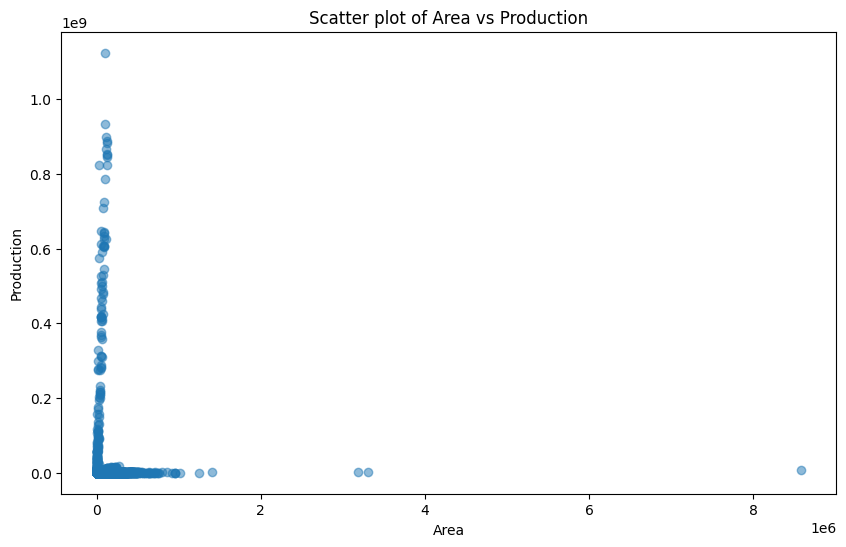


Correlation between the last two columns:
                Area  Production
Area        1.000000    0.040989
Production  0.040989    1.000000


In [38]:
# Scatter plot to visualize the relationship between the last two columns
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, -2], df.iloc[:, -1], alpha=0.5)
plt.title('Scatter plot of Area vs Production')
plt.xlabel(df.columns[-2])
plt.ylabel(df.columns[-1])
plt.show()

# Correlation between the last two columns
correlation_last_two = df.iloc[:, -2:].corr()
print("\nCorrelation between the last two columns:")
print(correlation_last_two)

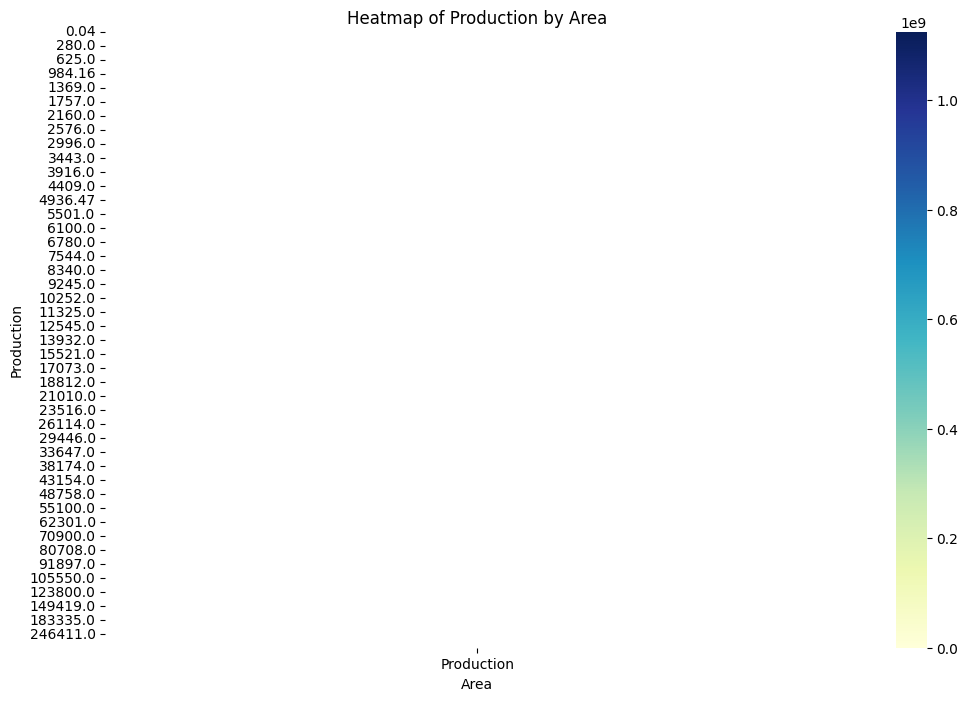

In [39]:
# Create a pivot table for the heatmap
pivot_table = df.pivot_table(values='Production', index='Area', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Production by Area')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

In [42]:
# Final Insights
print("Final Insights:")

# 1. General Information
print("\n1. General Information:")
print(df.info())

# 2. Basic Statistics
print("\n2. Basic Statistics:")
print(df.describe())

# 3. Missing Values
print("\n3. Missing Values:")
print(df.isnull().sum())

# 4. Correlation between 'Area' and 'Production'
print("\n4. Correlation between 'Area' and 'Production':")
print(correlation)

# 5. Most Produced Crop
print("\n5. Most Produced Crop:")
print(f"The crop with the most production is {most_produced_crop} with a production of {most_produced_crop_production}.")

# 6. Suggested Crops for Each Season
print("\n6. Suggested Crops for Each Season:")
for season, crop in suggested_crops.items():
    print(f"The suggested crop for {season} is {crop[1]} with a production of {suggested_crops_production[season]}.")

# 7. Yearly Production
print("\n7. Yearly Production:")
print(yearly_production.sort_values(ascending=False).head())

# Suggestions
print("\nSuggestions:")

# 1. Address Missing Values
print("\n1. Address Missing Values:")
print("Consider addressing the missing values in the dataset to improve the accuracy of the analysis.")

# 2. Focus on High Production Crops
print("\n2. Focus on High Production Crops:")
print(f"Focus on cultivating {most_produced_crop} as it has the highest production.")

# 3. Seasonal Crop Planning
print("\n3. Seasonal Crop Planning:")
print("Plan crop cultivation based on the suggested crops for each season to maximize production.")

# 4. Monitor and Improve Correlation
print("\n4. Monitor and Improve Correlation:")
print("Monitor the correlation between 'Area' and 'Production' and implement strategies to improve it.")

# 5. Yearly Production Trends
print("\n5. Yearly Production Trends:")
print("Analyze the yearly production trends to identify patterns and make informed decisions for future cultivation.")

Final Insights:

1. General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73827 entries, 0 to 73826
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RowID          73827 non-null  int64  
 1   State_Name     73827 non-null  object 
 2   District_Name  73827 non-null  object 
 3   Crop_Year      73827 non-null  int64  
 4   Season         73827 non-null  object 
 5   Crop           73827 non-null  object 
 6   Area           73827 non-null  float64
 7   Production     73827 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None

2. Basic Statistics:
              RowID     Crop_Year          Area    Production
count  73827.000000  73827.000000  7.382700e+04  7.382700e+04
mean   36913.000000   2013.657551  1.218297e+04  6.210320e+05
std    21312.163499      4.954910  5.348285e+04  1.736719e+07
min        0.000000   2005.000000  4.000000e-02  0.000000e+00
25%    18456